Slido

https://app.sli.do/event/3SUPDfwYUh2KuZQkGAyXqA

前面的課

https://github.com/vcdemy/20240328/blob/main/20240328%E7%AD%86%E8%A8%98.ipynb

https://github.com/vcdemy/20240411/blob/main/20240411.ipynb

https://github.com/vcdemy/20240418/blob/main/20240418%E7%AD%86%E8%A8%98.ipynb

https://github.com/vcdemy/20240425/blob/main/20240425%E7%AD%86%E8%A8%98.ipynb


* numpy
    * 基本運算
    * indexing
    * slicing
    * clip
    * ravel
* 影像處理基本操作
    * 開啟檔案
        * PIL
        * skimage
        * cv2
    * 圖片縮放
        * thumbnail
        * resize
    * 圖片旋轉
    * 灰階轉換
* 影像處理再階一點點
    * 裁切
    * 貼圖
    * 嵌字
    * 圖層操作
    * histogram
    * thresholding

In [ ]:
# 圖
lena_url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
moon_url = "https://upload.wikimedia.org/wikipedia/commons/e/e1/FullMoon2010.jpg"

In [ ]:
import numpy as np

# numpy

## 四則運算

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([7, 8, 9, 10])

In [ ]:
a + b

## indexing

In [ ]:
a = np.array([1, 2, 3, 4])

In [ ]:
a[2]

In [ ]:
a = np.array([1, 2, 3, 4, 5])

In [ ]:
start = 2 - 1
end = 4

a[start: end]
a[1: 4]
a[1: 1 + 3]
# 都一樣

In [ ]:
img = np.arange(3*3*3).reshape((3, 3, 3))
img

In [ ]:
red = img[:, :, 0]
red

## Clip

In [ ]:
a = np.arange(100)
a

In [ ]:
np.clip(a, a_min=30, a_max=70)

## ravel 

In [ ]:
img = np.arange(3*3*3).reshape((3, 3, 3))
img

In [ ]:
img.ravel()

In [ ]:
img.reshape((27,))

# 影像處理的基本操作

## 開啟檔案

In [ ]:
!curl -O https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
!curl -O https://upload.wikimedia.org/wikipedia/commons/e/e1/FullMoon2010.jpg

In [ ]:
使用任意方法開啟檔案
opencv
pillow
skimage

In [ ]:
# pillow
from PIL import Image
pil_img = Image.open('lena.png')

In [ ]:
# open cv
import cv2
cv_img = cv2.imread('lena.png')

In [ ]:
# sci-kit image
import skimage as ski
sk_img = ski.io.imread('lena.png')

## 顯示圖案

In [ ]:
使用任意方法顯示圖案
jupyter, cv2, matplotlib, plotly express

In [ ]:
# jupyter, 只適用 pillow 的圖檔
pil_img

In [ ]:
# open cv 的作法, 適用於 np.array 
cv2.imshow('title', cv_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# matplotlib
from matplotlib import pyplot as plt
plt.imshow(sk_img)

In [ ]:
# plotly express
import plotly.express as px
px.imshow(sk_img)

## 圖片縮放

In [ ]:
pil_pen = Image.open('pen.jpg')

In [ ]:
pil_pen.size

In [ ]:
# thumbnail 會等比縮放
img = pil_pen.copy()
size = (50, 50)
img.thumbnail(size)
print(img.size)
img


In [ ]:
使用 resize 把圖片縮放到 50x50

In [ ]:
img = pil_pen.copy()
size = (50, 50)
resized = img.resize(size)
print(resized.size)
resized

In [ ]:
img = pil_pen.copy()
print(img.size)
img.thumbnail((50, 50))
print(img.size)
img.thumbnail((100, 100))
print(img.size)

In [ ]:
img = pil_pen.copy()
print(img.size)
img = img.resize((50, 50))
print(img.size)
img = img.resize((100, 100))
print(img.size)
img

* thumbnail 的特徵
    * 只能縮小
    * 等比縮小
    * inplace 縮放, 會更動到原圖
* resize 的特徵
    * 可以放大縮小
    * 強制指定 size (不管原圖的比例)
    * 不會動到原圖, 會產生新圖

## 圖片旋轉

In [ ]:
print(pil_img.rotate(-45).size)
print(pil_img.size)
pil_img.rotate(-45)

In [ ]:
print(pil_img.rotate(45, expand=True).size)
pil_img.rotate(45, expand=True)

In [ ]:
pil_img.rotate(45, expand=True, fillcolor='green')

* expand=True 會放大圖, 把每個像素都保留
* expand=False 圖的長寬不變, 原圖會被截掉
* fillcolor 可以指定背景顏色

## 灰階處理

In [ ]:
# pillow 作法
pil_img.convert('L')

In [ ]:
# scikit image 的作法
from skimage.color import rgb2gray
sk_img_gray = (rgb2gray(sk_img) * 256).astype(np.uint8)
px.imshow(sk_img_gray, color_continuous_scale='gray')

In [ ]:
# open cv 作法
gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
px.imshow(gray, color_continuous_scale='gray')

In [ ]:
# opencv 作法 2
gray2 = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
gray2.shape

## 存檔

In [ ]:
# pillow 的作法
img2 = pil_img.convert('L')
img2.save('lena_grey_pil.png')

In [ ]:
# opencv 的作法
cv2.imwrite('lena_grey_cv.png', gray2)

In [ ]:
# scikit-image 的作法
from skimage.color import gray2rgb
ski.io.imsave('lena_grey_sk.png', sk_img_gray)


# 影像處理再階一點點

## 裁切

In [ ]:
px.imshow(pil_img)

In [ ]:
left = 180
top = 180
right = 400
bottom = 400
box = (left, top, right, bottom)
pil_img.crop(box)

## 貼圖
將圖片(小)嵌到另一個圖片(大)內

In [ ]:
small = pil_pen.copy()
small.thumbnail((50, 50))
small

In [ ]:
large = pil_img.copy()

In [ ]:
large.paste(small, box=(160, 160))

In [ ]:
px.imshow(large)

## 嵌字

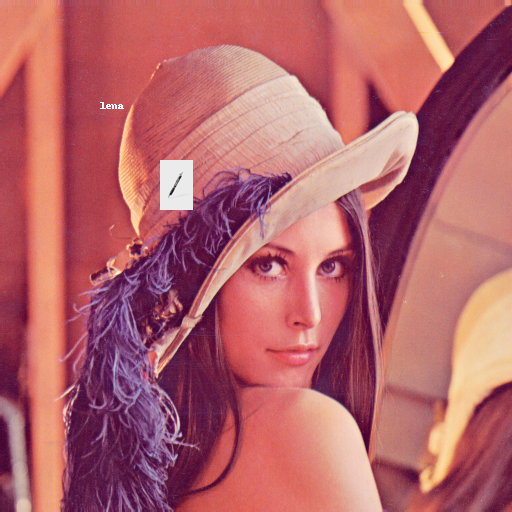

In [192]:
from PIL import ImageDraw
draw = ImageDraw.Draw(large)
draw.text((100, 100), 'lena')
large

* 影像處理再階一點點
    * 嵌字
    * 圖層操作
    * histogram
    * thresholding